In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import os

class draw_data:
    def __init__(self, **kwargs):
        self.loss_list = kwargs.get('loss_list', [])
        self.opt_gap_list = kwargs.get('optgap_list', [])
        self.psnr_list = kwargs.get('psnr_list', [])
        self.ssim_list = kwargs.get('ssim_list', [])
        self.acc_train_list = kwargs.get('acc_train_list', [])
        self.acc_test_list = kwargs.get('acc_test_list', [])

def get_data(path,name=''):
    if path.split('_')[0] == 'fmnist':
        loss = np.load(path+'/loss'+name+'.npy')
        optgap = np.load(path+'/opt_gap'+name+'.npy')
        psnr = np.load(path+'/psnr'+name+'.npy')
        ssim = np.load(path+'/ssim'+name+'.npy')
        return draw_data(loss_list=loss, optgap_list=optgap, psnr_list=psnr, ssim_list=ssim)
    else:
        loss = np.load(path+'/loss'+name+'.npy')
        optgap = np.load(path+'/opt_gap'+name+'.npy')
        acc_test  = np.load(path+'/acc_test'+name+'.npy')
        acc_train = np.load(path+'/acc_train'+name+'.npy')
        return draw_data(loss_list=loss, optgap_list=optgap, acc_test_list=acc_test, acc_train_list=acc_train)

dir = 'a9a_log'
# dir = 'covtype_mlp'
# dir = 'a9a_mlp'

AB_VRDAGT_Instance = get_data('../draw/'+dir,'AB_VRDAGT')
AB_DAGT_Instance = get_data('../draw/'+dir,'AB_DAGT')
AB_SAGA_Instance = get_data('../draw/'+dir,'AB_SAGA')
GT_VR_Instance = get_data('../draw/'+dir,'GT_VR')

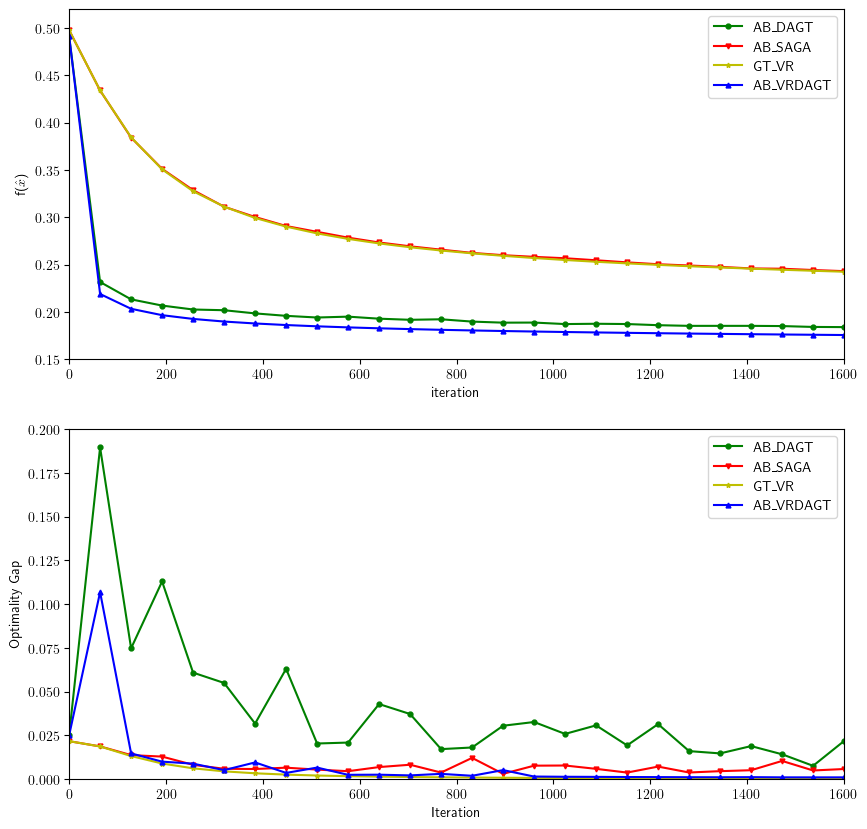

In [3]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rc('text', usetex=True)
# 绘制机器学习任务
fig,ax = plt.subplots(2,1,figsize=(10,10))
marksize = 3.5
T = 1600
step = 4
index=range(0,T+T//100,T//100)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel(r'f($\hat{x}$)')
ax[0].plot(index[::step],AB_DAGT_Instance.loss_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[0].plot(index[::step],AB_SAGA_Instance.loss_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[0].plot(index[::step],GT_VR_Instance.loss_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[0].plot(index[::step],AB_VRDAGT_Instance.loss_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax[0].legend()

# #局部放大图，放大后100个点
# axins_loss = ax[0].inset_axes([0.75, 0.5, 0.2, 0.2])
# axins_loss.plot(range(T-100,T),AB_SAGA_Instance.loss_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=5)
# axins_loss.plot(range(T-100,T),GT_VR_Instance.loss_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=5)

# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(AB_SAGA_Instance.loss_list[T-100:]), max(AB_SAGA_Instance.loss_list[T-100:])+0.005
# axins_loss.set_xlim(x1, x2)
# axins_loss.set_ylim(y1, y2)
# # # 添加连接线
# mark_inset(ax[0], axins_loss, loc1=3, loc2=1, fc="none", ec='0.5')

# #局部放大图，放大后100个点
# axins_loss = ax[0].inset_axes([0.5, 0.2, 0.2, 0.2])
# axins_loss.plot(range(T-100,T),AB_DAGT_Instance.loss_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=5)
# axins_loss.plot(range(T-100,T),AB_VRDAGT_Instance.loss_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=5)

# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(AB_VRDAGT_Instance.loss_list[T-100:])-0.005, max(AB_DAGT_Instance.loss_list[T-100:])+0.005
# axins_loss.set_xlim(x1, x2)
# axins_loss.set_ylim(y1, y2)
# # # 添加连接线
# mark_inset(ax[0], axins_loss, loc1=3, loc2=1, fc="none", ec='0.5')

############################################################################################################

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Optimality Gap')
ax[1].plot(index[::step],AB_DAGT_Instance.opt_gap_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[1].plot(index[::step],AB_SAGA_Instance.opt_gap_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[1].plot(index[::step],GT_VR_Instance.opt_gap_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[1].plot(index[::step],AB_VRDAGT_Instance.opt_gap_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
# #局部放大图，放大后100个点
# axins_optgap = ax[1].inset_axes([0.6, 0.3, 0.3, 0.3])
# axins_optgap.plot(range(T-100,T),AB_DAGT_Instance.opt_gap_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=2)
# axins_optgap.plot(range(T-100,T),AB_SAGA_Instance.opt_gap_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=2)
# axins_optgap.plot(range(T-100,T),GT_VR_Instance.opt_gap_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=2)
# axins_optgap.plot(range(T-100,T),AB_VRDAGT_Instance.opt_gap_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, 0, max(AB_DAGT_Instance.opt_gap_list[T-100:])
# axins_optgap.set_xlim(x1, x2)
# axins_optgap.set_ylim(y1, y2)
# # # 添加连接线
# mark_inset(ax[1], axins_optgap, loc1=3, loc2=1, fc="none", ec='0.5')

ax[1].legend()
ax[1].legend()
ax[0].axis([0, 1600, 0.15, 0.5+0.02])
ax[1].axis([0, 1600, 0,0.2])
plt.savefig('../draw/'+dir+'/loss_gap.pdf',bbox_inches='tight')
plt.show()

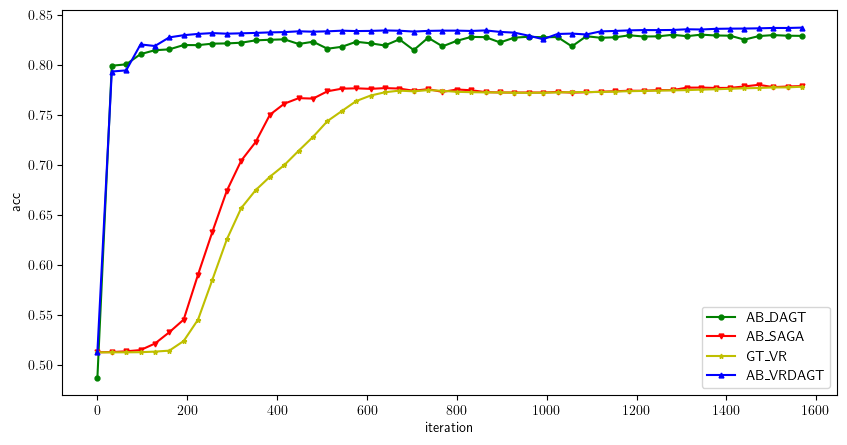

In [32]:
# 绘制acc准确率
fig,ax = plt.subplots(1,1,figsize=(10,5))
marksize = 3.5
T = 1600
points = 50
step = T//points
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
ax.plot(range(0,T,step),AB_DAGT_Instance.acc_train_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax.plot(range(0,T,step),AB_SAGA_Instance.acc_train_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax.plot(range(0,T,step),GT_VR_Instance.acc_train_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax.plot(range(0,T,step),AB_VRDAGT_Instance.acc_train_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax.legend()
# # 局部放大图，放大后100个点
# axins_acc = ax.inset_axes([0.3, 0.4, 0.2, 0.2])
# axins_acc.plot(range(T-100,T),AB_DAGT_Instance.acc_train_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=2)
# axins_acc.plot(range(T-100,T),AB_VRDAGT_Instance.acc_train_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(AB_DAGT_Instance.acc_train_list[T-100:])-0.005, max(AB_VRDAGT_Instance.acc_train_list[T-100:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')

# axins_acc = ax.inset_axes([0.6, 0.4, 0.2, 0.2])
# axins_acc.plot(range(T-100,T),AB_SAGA_Instance.acc_train_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=2)
# axins_acc.plot(range(T-100,T),GT_VR_Instance.acc_train_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(GT_VR_Instance.acc_train_list[T-100:])-0.005, max(AB_SAGA_Instance.acc_train_list[T-100:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# 添加连接线
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')
plt.savefig('./draw/'+dir+'/acc_train.pdf',bbox_inches='tight')
plt.show()


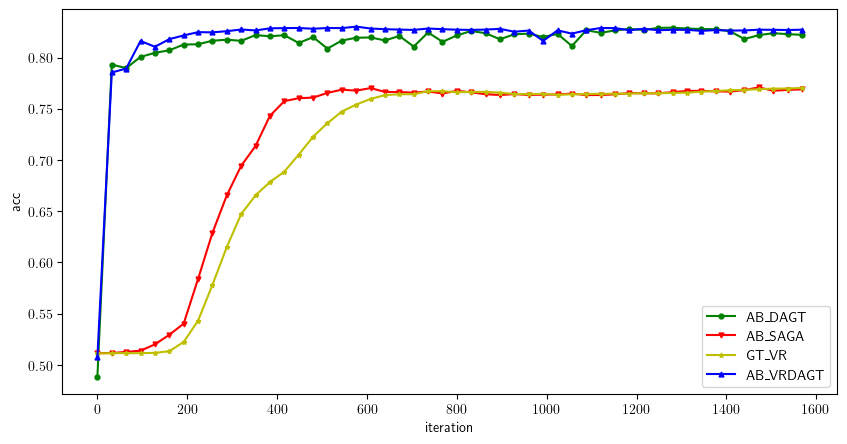

In [33]:
# 绘制acc准确率
fig,ax = plt.subplots(1,1,figsize=(10,5))
marksize = 3.5
T = 1600
points = 50
step = T//points
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
ax.plot(range(0,T,step),AB_DAGT_Instance.acc_test_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax.plot(range(0,T,step),AB_SAGA_Instance.acc_test_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax.plot(range(0,T,step),GT_VR_Instance.acc_test_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax.plot(range(0,T,step),AB_VRDAGT_Instance.acc_test_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax.legend()
# # 局部放大图，放大后100个点
# axins_acc = ax.inset_axes([0.3, 0.4, 0.2, 0.2])
# axins_acc.plot(range(T-100,T),AB_DAGT_Instance.acc_test_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=2)
# axins_acc.plot(range(T-100,T),AB_VRDAGT_Instance.acc_test_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(AB_DAGT_Instance.acc_test_list[T-100:])-0.005, max(AB_VRDAGT_Instance.acc_test_list[T-100:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')

# axins_acc = ax.inset_axes([0.6, 0.4, 0.2, 0.2])
# axins_acc.plot(range(T-100,T),AB_SAGA_Instance.acc_test_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=2)
# axins_acc.plot(range(T-100,T),GT_VR_Instance.acc_test_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = T-100, T, min(GT_VR_Instance.acc_test_list[T-100:])-0.005, max(AB_SAGA_Instance.acc_test_list[T-100:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# # 添加连接线
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')
plt.savefig('./draw/'+dir+'/acc_test.pdf',bbox_inches='tight')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

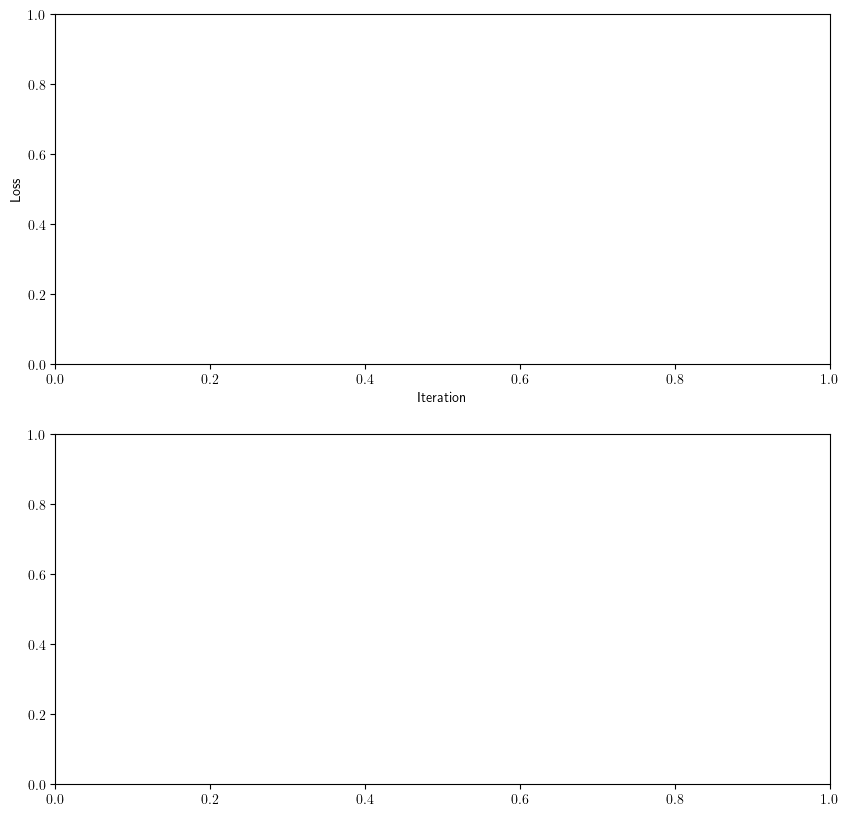

In [20]:
#绘制图像去模糊任务
fig,ax = plt.subplots(2,1,figsize=(10,10))
marksize = 3.5
T = 10000
step = T//points
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].plot(range(0,T,step),AB_DAGT_Instance.loss_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[0].plot(range(0,T,step),AB_SAGA_Instance.loss_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[0].plot(range(0,T,step),GT_VR_Instance.loss_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[0].plot(range(0,T,step),AB_VRDAGT_Instance.loss_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax[0].legend()

#局部放大图，放大后100个点
axins_loss = ax[0].inset_axes([0.6, 0.6, 0.2, 0.2])
axins_loss.plot(range(T-100,T),AB_SAGA_Instance.loss_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=5)
axins_loss.plot(range(T-100,T),GT_VR_Instance.loss_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=5)
axins_loss.plot(range(T-100,T),AB_DAGT_Instance.loss_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=5)
axins_loss.plot(range(T-100,T),AB_VRDAGT_Instance.loss_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=5)

# 设定放大区域
x1, x2, y1, y2 = T-100, T, min(AB_VRDAGT_Instance.loss_list[T-100:]), max(AB_DAGT_Instance.loss_list[T-100:])
axins_loss.set_xlim(x1, x2)
axins_loss.set_ylim(y1, y2)
# # 添加连接线
mark_inset(ax[0], axins_loss, loc1=3, loc2=1, fc="none", ec='0.5')

############################################################################################################

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Optimality Gap')
ax[1].plot(range(0,T,step),AB_DAGT_Instance.opt_gap_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[1].plot(range(0,T,step),AB_SAGA_Instance.opt_gap_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[1].plot(range(0,T,step),GT_VR_Instance.opt_gap_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[1].plot(range(0,T,step),AB_VRDAGT_Instance.opt_gap_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
#局部放大图，放大后100个点
axins_optgap = ax[1].inset_axes([0.6, 0.3, 0.3, 0.3])
axins_optgap.plot(range(T-100,T),AB_DAGT_Instance.opt_gap_list[T-100:],'go-',label='AB_DAGT',markersize=marksize,markevery=2)
axins_optgap.plot(range(T-100,T),AB_SAGA_Instance.opt_gap_list[T-100:],'rv-',label='AB_SAGA',markersize=marksize,markevery=2)
axins_optgap.plot(range(T-100,T),GT_VR_Instance.opt_gap_list[T-100:],'y*-',label='GT_VR',markersize=marksize,markevery=2)
axins_optgap.plot(range(T-100,T),AB_VRDAGT_Instance.opt_gap_list[T-100:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=2)
# 设定放大区域
x1, x2, y1, y2 = T-100, T, 0, max(AB_DAGT_Instance.opt_gap_list[T-100:])
axins_optgap.set_xlim(x1, x2)
axins_optgap.set_ylim(y1, y2)
# # 添加连接线
mark_inset(ax[1], axins_optgap, loc1=3, loc2=1, fc="none", ec='0.5')
ax[1].legend()
ax[1].legend()
plt.savefig(dir_path+'/loss_optgap.png')

# 绘制模糊图像和去模糊后的图像
orgin_iamge = fashion_mnist_bur.image
blur_image = fashion_mnist_bur.Y[0].reshape(28,28).numpy()
deblur_image_AB_DAGT = Model_AB_DAGT.state_dict()['x'].reshape(28,28).numpy()
deblur_image_AB_SAGA = Model_AB_SAGA.state_dict()['x'].reshape(28,28).numpy()
deblur_image_AB_VRDAGT = Model_AB_VRDAGT.state_dict()['x'].reshape(28,28).numpy()
deblur_image_GT_VR = Model_GT_VR.state_dict()['x'].reshape(28,28).numpy()
fig,ax = plt.subplots(2,3,figsize=(10,7))
ax[0][0].imshow(orgin_iamge,cmap='gray')
ax[0][0].set_title('orgin image')
ax[0][1].imshow(blur_image,cmap='gray')
ax[0][1].set_title('blur image')
ax[0][2].imshow(deblur_image_AB_DAGT,cmap='gray')
ax[0][2].set_title('deblur image AB_DAGT')
ax[1][0].imshow(deblur_image_AB_SAGA,cmap='gray')
ax[1][0].set_title('deblur image AB_SAGA')
ax[1][1].imshow(deblur_image_AB_VRDAGT,cmap='gray')
ax[1][1].set_title('deblur image AB_VRDAGT')
ax[1][2].imshow(deblur_image_GT_VR,cmap='gray')
ax[1][2].set_title('deblur image GT_VR')
plt.savefig(dir_path+'/image.png')
plt.close()


# 绘制psnr和ssim
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('PSNR')
ax[0].plot(range(0,T,step),AB_DAGT_Instance.psnr_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[0].plot(range(0,T,step),AB_SAGA_Instance.psnr_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[0].plot(range(0,T,step),GT_VR_Instance.psnr_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[0].plot(range(0,T,step),AB_VRDAGT_Instance.psnr_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax[0].legend()

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('SSIM')
ax[1].plot(range(0,T,step),AB_DAGT_Instance.ssim_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax[1].plot(range(0,T,step),AB_SAGA_Instance.ssim_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax[1].plot(range(0,T,step),GT_VR_Instance.ssim_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax[1].plot(range(0,T,step),AB_VRDAGT_Instance.ssim_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax[1].legend()
plt.close()

In [1]:
# 绘制模糊图像和去模糊后的图像
import torch

orgin_iamge = []
blur_image = []
deblur_image_AB_VRDAGT = []
orgin_iamge_dir = np.genfromtxt('./data/fashion_mnist/fashion_mnist_10.csv',delimiter=',',dtype=np.float32,skip_header=1)[:,:784]
for i in range(10):
    dir = './draw/image_deb_'+str(i)
    orgin_iamge.append(orgin_iamge_dir[i].reshape(28,28))
    blur_image.append(np.load(dir+'/blur_data.npy').reshape(28,28))
    db = torch.load(dir+'/model_avgAB_VRDAGT.pt')
    deblur_image_AB_VRDAGT.append(db['x'].reshape(28,28).numpy())


NameError: name 'np' is not defined

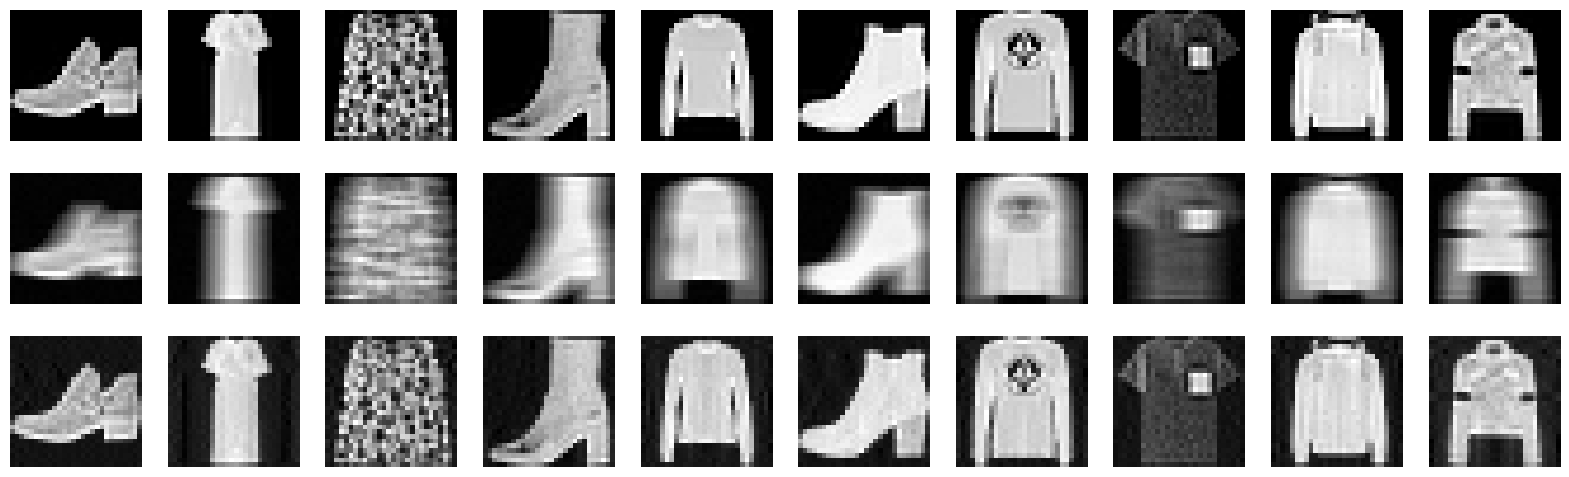

In [ ]:
fig,ax = plt.subplots(3,10,figsize=(20,6))
for i in range(10):
    ax[0][i].imshow(orgin_iamge[i],cmap='gray')
    ax[1][i].imshow(blur_image[i],cmap='gray')
    ax[2][i].imshow(deblur_image_AB_VRDAGT[i],cmap='gray')
# 关闭坐标轴
for i in range(10):
    ax[0][i].axis('off')
    ax[1][i].axis('off')
    ax[2][i].axis('off')
ax[0][0].set_ylabel('orgin image')
ax[1][0].set_ylabel('blurred image')
ax[2][0].set_ylabel('deblured image')


plt.show()

In [ ]:
# 从文件夹中读取psnr和ssim数据
import pandas as pd
alg_name = ['AB_DAGT','AB_SAGA','GT_VR','AB_VRDAGT']
data_psnr = pd.DataFrame(columns=alg_name)
for i in range(10):
    for alg in alg_name:
        data_psnr.loc[i,alg] = np.load('./draw/image_deb_'+str(i)+'/psnr'+alg+'.npy')[-1]
data_ssim = pd.DataFrame(columns=alg_name)
for i in range(10):
    for alg in alg_name:
        data_ssim.loc[i,alg] = np.load('./draw/image_deb_'+str(i)+'/ssim'+alg+'.npy')[-1]
# 合并数据
data=pd.concat([data_psnr,data_ssim],axis=1)
# 保存数据
data.to_csv('./draw/image_deb.csv')
        
